In [4]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\Naomi\AppData\Local\Temp\ipykernel_10860\1377739807.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert= False)


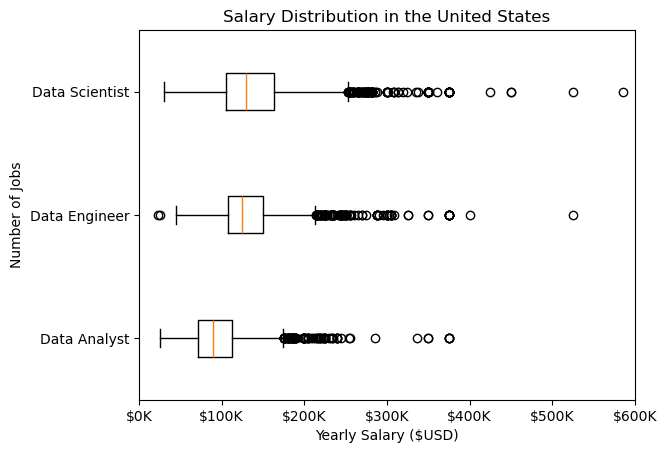

In [ ]:
#SALARY DISTRIBUTION ON THE UNITED STATES - BOX PLOT

job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylabel('Number of Jobs')
plt.xlim(0,600000)
plt.show()

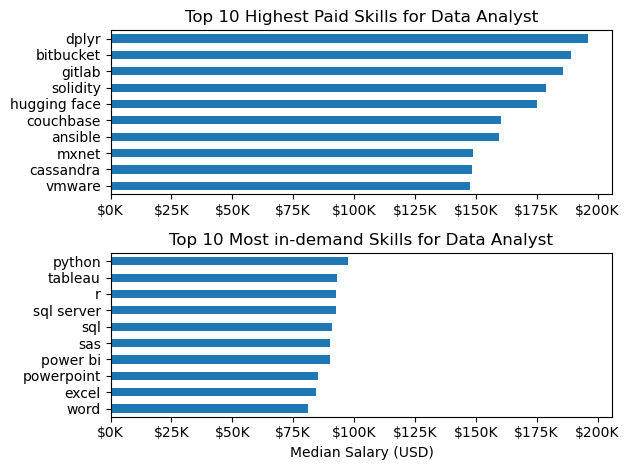

In [ ]:
# Top 10 Highest Paid Skills for Data Analyst (2 GRAFICS)

# PARTE 1

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


#PARTE 1: EXPLODE EN SKILLS

df_DA_US =df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]




# PARTE 2:  GROUP BY 

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending =False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending = False).head(10).sort_values(by='median',ascending=False)


# PARTE 3: GRAFIC 

fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most in-demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

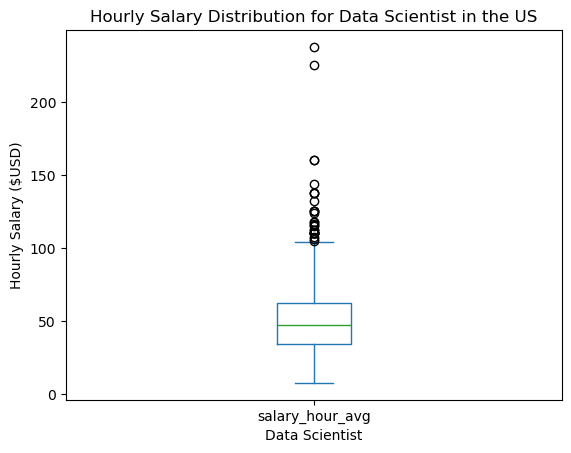

In [10]:
# Data Scientist Hourly Salary Box Plot 

# Filter out data
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

# Plot the boxplot
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

C:\Users\Naomi\AppData\Local\Temp\ipykernel_10860\2290094078.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=countries)


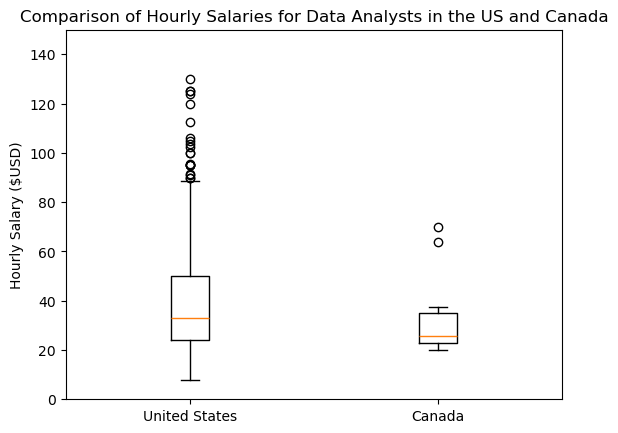

In [ ]:
# Comparison of Hourly Salaries for Data Analyst

# Filter out data
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

# Get list of DataFrames for each country
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

# Plot chart
plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

C:\Users\Naomi\AppData\Local\Temp\ipykernel_10860\2844099183.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


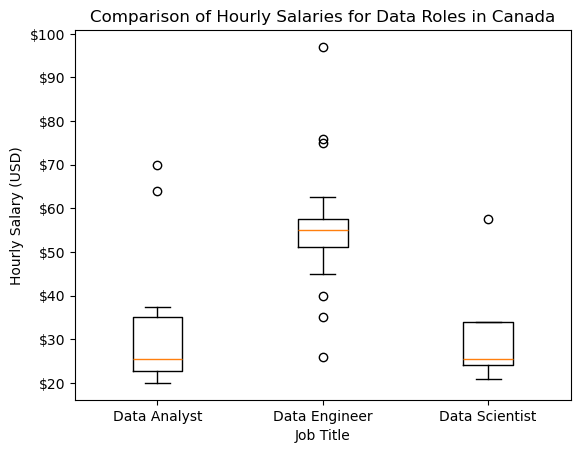

In [12]:
# Comparison of Hourly Salaries in Canada (2.18.3) - Problem

# Filter out data
df_Canada = df[df['job_country'] == 'Canada'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()